In [2]:
import sys
from pathlib import Path

try:
    notebook_path = Path(__file__).resolve()
    project_root = notebook_path.parents[4]
except NameError:
    project_root = Path.cwd().parents[3]

sys.path.insert(0, str(project_root))
print("Project root added to sys.path:", project_root)

# load data
from processor import NarrativeQA

Project root added to sys.path: c:\Users\USER\BDC800-Capstone


In [3]:
# load data
narrativeqa_ds = NarrativeQA()
narrativeqa_ds.load('test')

c:\Users\USER\BDC800-Capstone\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER\.cache\huggingface\hub\datasets--deepmind--narrativeqa. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating validation split: 100%|██████████| 3461/3461 [00:13<00:00, 266.04 examples/s]



Test Mode: Processing first 5 items from NarrativeQA dataset...


Processing documents: 100%|██████████| 5/5 [00:00<00:00, 50.55item/s]


In [4]:
# get list of documents
docs = list(narrativeqa_ds.get_documents())

# get list of question answer pairs
qas = list(narrativeqa_ds.get_queries())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


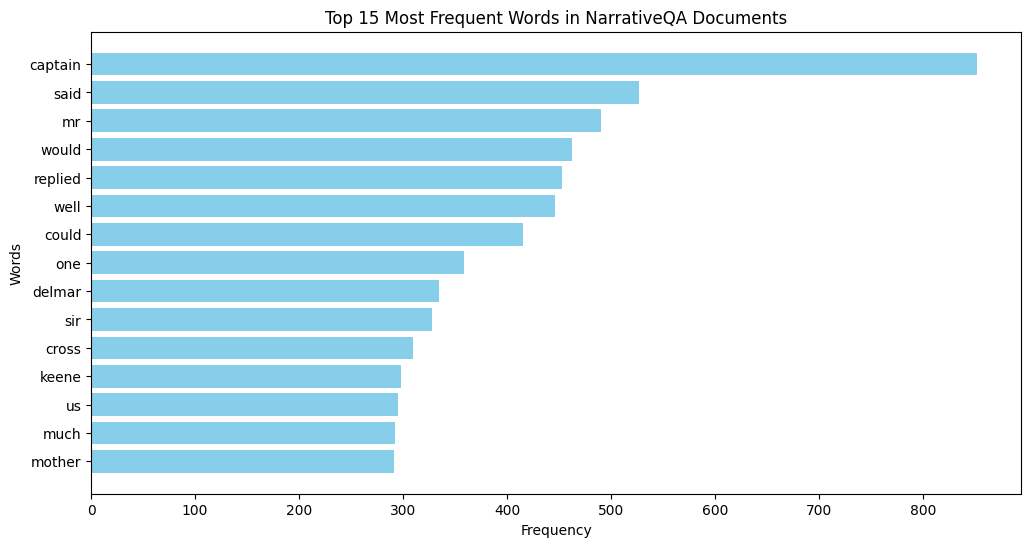

In [6]:
# Re-import necessary libraries since execution state was reset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


# Extract content from all documents
all_doc_content = " ".join(doc.content for doc in docs)


# Text Preprocessing Function
def preprocess_text(text):
    """Cleans text, removes punctuation, converts to lowercase, tokenizes, and removes stopwords."""
    cleaned_text = text.translate(str.maketrans("", "", string.punctuation)).lower()
    tokens = word_tokenize(cleaned_text)  # Tokenization
    
    stop_words = set(stopwords.words("english"))  # Load NLTK stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    return Counter(filtered_tokens)  # Return word frequency

# Process document content
doc_word_freq = preprocess_text(all_doc_content)

# Convert to DataFrame for visualization
df_doc_word_freq = pd.DataFrame(doc_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_doc_word_freq.head(15)

# Plot the top 15 most frequent words
plt.figure(figsize=(12, 6))
plt.barh(df_doc_word_freq.head(15)['Word'], df_doc_word_freq.head(15)['Frequency'], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 15 Most Frequent Words in NarrativeQA Documents")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


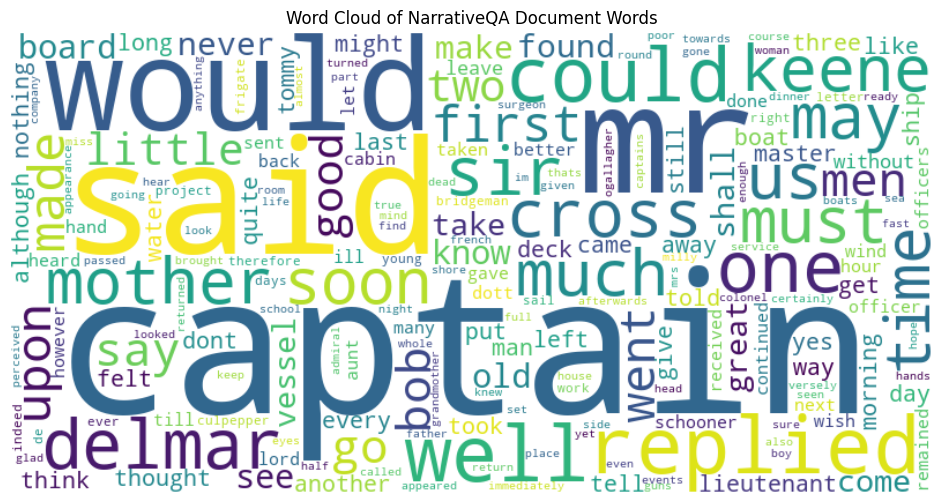

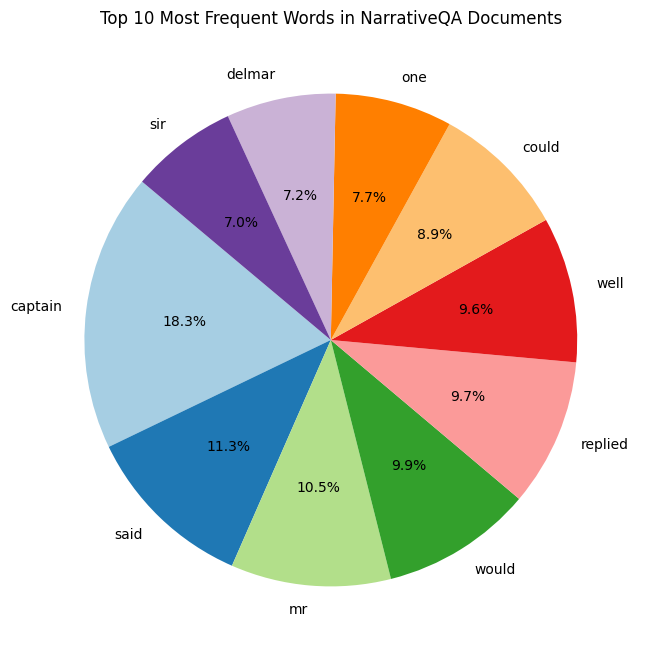

In [7]:
# 1. Word Cloud
from wordcloud import WordCloud

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(doc_word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of NarrativeQA Document Words")
plt.show()

# .2 Pie Chart of the Top 10 Words
top_10_words = df_doc_word_freq.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_words['Frequency'], labels=top_10_words['Word'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Most Frequent Words in NarrativeQA Documents")
plt.show()
